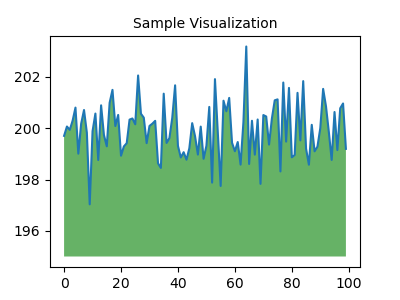

In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

### How to Upload `IPL data.csv` to Colab

1.  **Click the 'Files' icon** on the left sidebar (it looks like a folder).
2.  **Click the 'Upload to session storage' icon** (it looks like a file with an arrow pointing upwards).
3.  **Select `IPL data.csv`** from your local machine and click 'Open'.

Once the file is uploaded, you can re-run the previous cells that produced `FileNotFoundError`.

### Handling Missing Values Strategies

Given the `ipl_df` DataFrame, we have several columns with missing values. Let's explore common strategies to handle them:

#### 1. Dropping Rows with Missing Values

This method removes any row that contains at least one missing value. It's straightforward but can lead to significant data loss if many rows have missing data.

In [2]:
import pandas as pd
ipl_df = pd.read_csv('/content/IPL data (1).csv')

# Create a copy to avoid modifying the original DataFrame for demonstration
ipl_df_dropped_rows = ipl_df.copy()

# Drop rows where any value is missing
initial_rows = ipl_df_dropped_rows.shape[0]
ipl_df_dropped_rows.dropna(inplace=True)
final_rows = ipl_df_dropped_rows.shape[0]

print(f"Original rows: {initial_rows}, Rows after dropping: {final_rows}")
print("\nMissing values after dropping rows:")
print(ipl_df_dropped_rows.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: '/content/IPL data (1).csv'

#### 2. Imputation with Mean/Median (for Numerical Columns)

For numerical columns, we can replace missing values with the mean or median of that column. Median is often preferred for skewed distributions (like player costs) to be less affected by outliers.

In [ ]:


# Create a copy
ipl_df_imputed_mean = ipl_df.copy()

# Identify numerical columns with missing values (excluding 'Unnamed: 0' and the ones we've already filled with 0)
numerical_cols_to_impute = ['Base Price IN ₹', 'Base Price IN $']

for col in numerical_cols_to_impute:
    if col in ipl_df_imputed_mean.columns and ipl_df_imputed_mean[col].isnull().any():
        median_val = ipl_df_imputed_mean[col].median()
        ipl_df_imputed_mean[col] = ipl_df_imputed_mean[col].fillna(median_val)

print("Missing values after median imputation for numerical columns:")
print(ipl_df_imputed_mean[['Base Price IN ₹', 'Base Price IN $']].isnull().sum())

Missing values after median imputation for numerical columns:
Base Price IN ₹    0
Base Price IN $    0
dtype: int64


#### 3. Imputation with Mode (for Categorical Columns)

For categorical columns, it's common to replace missing values with the mode (most frequent value).

In [ ]:


ipl_df = pd.read_csv('/content/IPL data (1).csv')
print("DataFrame 'ipl_df' loaded successfully.")
display(ipl_df.head())

DataFrame 'ipl_df' loaded successfully.


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
0,0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans,NaN,NaN
1,1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans,NaN,NaN
2,2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans,NaN,NaN
3,3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans,NaN,NaN
4,4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans,NaN,NaN


In [ ]:
print("Shape of the DataFrame:", ipl_df.shape)
print("\nColumn information and data types:")
ipl_df.info()
print("\nMissing values per column:")
print(ipl_df.isnull().sum())

Shape of the DataFrame: (568, 10)

Column information and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       568 non-null    int64  
 1   Player           568 non-null    object 
 2   Base Price       243 non-null    object 
 3   TYPE             568 non-null    object 
 4   COST IN ₹ (CR.)  243 non-null    float64
 5   Cost IN $ (000)  243 non-null    float64
 6   2022 Squad       230 non-null    object 
 7   Team             568 non-null    object 
 8   Base Price IN ₹  325 non-null    float64
 9   Base Price IN $  325 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 44.5+ KB

Missing values per column:
Unnamed: 0           0
Player               0
Base Price         325
TYPE                 0
COST IN ₹ (CR.)    325
Cost IN $ (000)    325
2022 Squad         338
Team                 

In [ ]:
import matplotlib.pyplot as plt

# Ensure the plot is the last one generated or re-generate it if needed
# (assuming the previous plot was the 'Distribution of Base Price')

# To save the last active plot
plt.savefig('base_price_distribution.png')
print("Plot saved as 'base_price_distribution.png'")

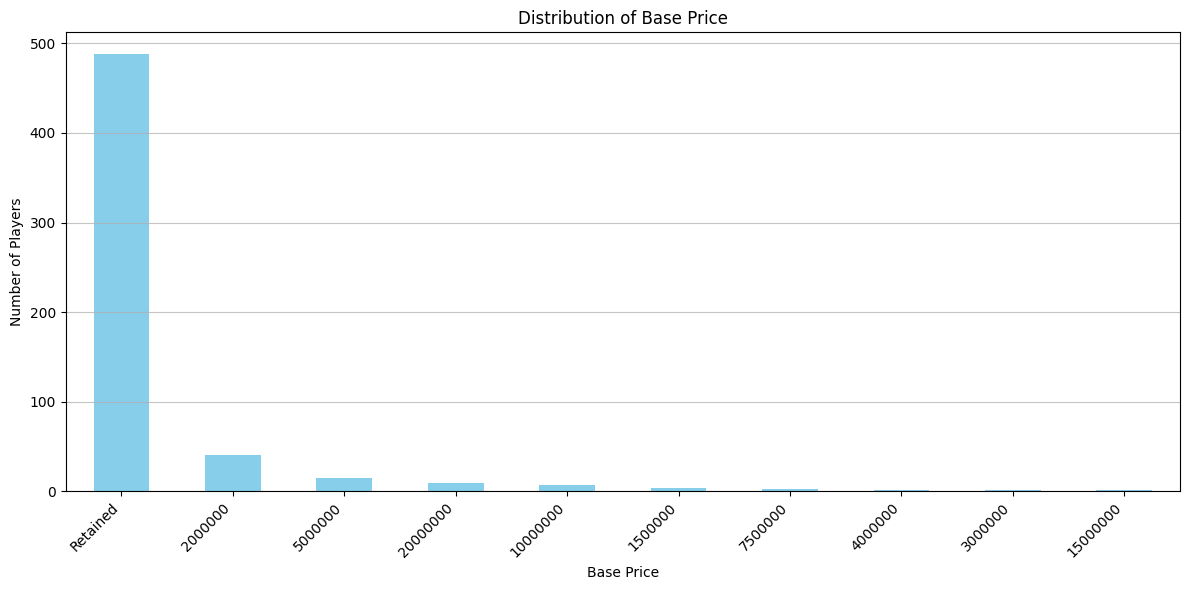

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure ipl_df_imputed_mode is available (re-loading if necessary to make cell self-contained)
ipl_df = pd.read_csv('/content/IPL data (1).csv')
ipl_df_imputed_mode = ipl_df.copy()
categorical_cols_to_impute = ['Base Price', '2022 Squad']
for col in categorical_cols_to_impute:
    if col in ipl_df_imputed_mode.columns and ipl_df_imputed_mode[col].isnull().any():
        mode_val = ipl_df_imputed_mode[col].mode()[0]
        ipl_df_imputed_mode[col] = ipl_df_imputed_mode[col].fillna(mode_val)


base_price_distribution = ipl_df_imputed_mode['Base Price'].value_counts()

plt.figure(figsize=(12, 6))
base_price_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Basic Statistical Analysis

### Subtask:
Generate descriptive statistics for numerical columns in the DataFrame to get an overview of the data's central tendency, dispersion, and shape.


**Reasoning**:
Generate descriptive statistics for all numerical columns in the `ipl_df` DataFrame to get an overview of central tendency, dispersion, and shape of the data.



In [ ]:
print("Descriptive statistics for numerical columns:")
print(ipl_df.describe())

Descriptive statistics for numerical columns:
       Unnamed: 0  COST IN ₹ (CR.)  Cost IN $ (000)  Base Price IN ₹  \
count  568.000000       243.000000       243.000000     3.250000e+02   
mean   283.500000         0.687243        82.469136     3.453846e+06   
std    164.111751         2.511700       301.404032     3.530864e+06   
min      0.000000         0.000000         0.000000     1.500000e+06   
25%    141.750000         0.000000         0.000000     2.000000e+06   
50%    283.500000         0.000000         0.000000     2.000000e+06   
75%    425.250000         0.200000        24.000000     4.000000e+06   
max    567.000000        18.500000      2220.000000     2.000000e+07   

       Base Price IN $  
count       325.000000  
mean      41446.153846  
std       42370.365390  
min       18000.000000  
25%       24000.000000  
50%       24000.000000  
75%       48000.000000  
max      240000.000000  


## Analyze Player Types and Visualize

### Subtask:
Determine the distribution of different player types (e.g., 'BATSMAN', 'BOWLER', 'WICKETKEEPER', 'ALL-ROUNDER') and create a pie chart or bar chart to visualize their proportions in the dataset. Make sure to provide a legend.


**Reasoning**:
Calculate the value counts for the 'TYPE' column to determine the distribution of player types and prepare the data for visualization. This directly addresses the first instruction of the subtask.



In [ ]:
player_type_distribution = ipl_df['TYPE'].value_counts()
print("Player Type Distribution:")
print(player_type_distribution)

Player Type Distribution:
TYPE
ALL-ROUNDER     213
BOWLER          189
BATSMAN          91
WICKETKEEPER     75
Name: count, dtype: int64


**Reasoning**:
Generate a pie chart from the `player_type_distribution` to visualize the proportion of each player type. This directly addresses the second and third instructions of the subtask.



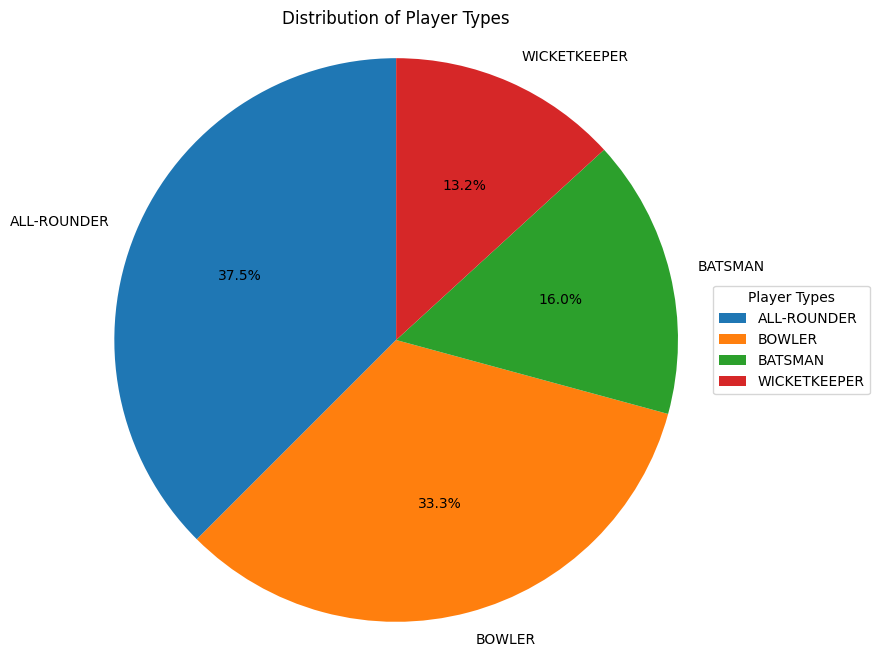

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(player_type_distribution, labels=player_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Player Types')
plt.legend(title="Player Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Analyze Cost Distribution and Visualize

### Subtask:
Examine the distribution of player costs ('COST IN ₹ (CR.)') using a histogram or box plot. Additionally, calculate and visualize the average cost per player type using a bar chart with a legend.


**Reasoning**:
Fill missing values in the 'COST IN ₹ (CR.)' column with 0 and then create a histogram to visualize the distribution of these costs. This addresses instructions 1 and 2 of the subtask.



In [ ]:
average_cost_per_type = ipl_df.groupby('TYPE')['COST IN ₹ (CR.)'].mean()
print("Average Cost per Player Type (in ₹ CR.):")
print(average_cost_per_type)

Average Cost per Player Type (in ₹ CR.):
TYPE
ALL-ROUNDER     0.332160
BATSMAN         0.401099
BOWLER          0.170106
WICKETKEEPER    0.368000
Name: COST IN ₹ (CR.), dtype: float64


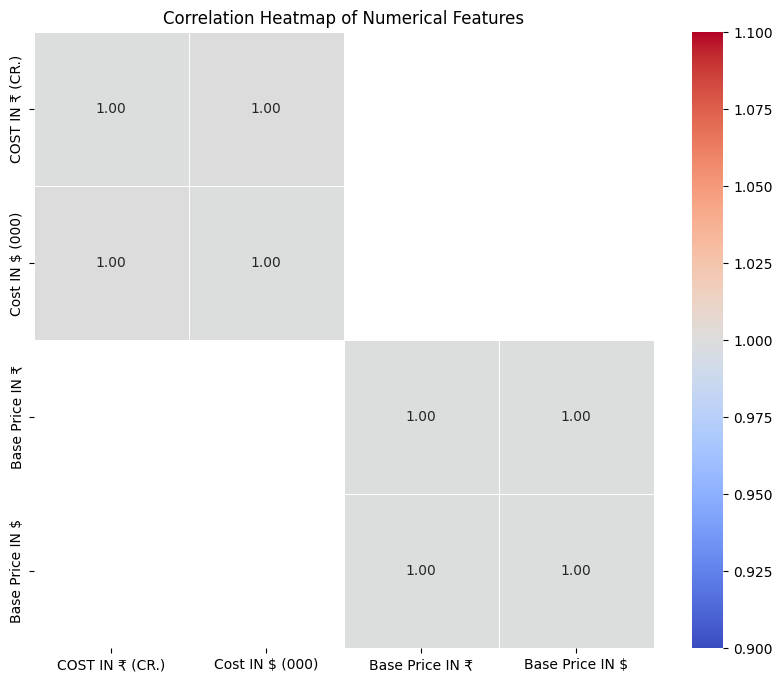

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
# Exclude 'Unnamed: 0' as it's likely an index column
numerical_cols = ipl_df[['COST IN ₹ (CR.)', 'Cost IN $ (000)', 'Base Price IN ₹', 'Base Price IN $']]

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Reasoning**:
Create a bar chart to visualize the average cost per player type, including appropriate labels, a clear title, and a legend. This directly addresses the fourth instruction of the subtask.



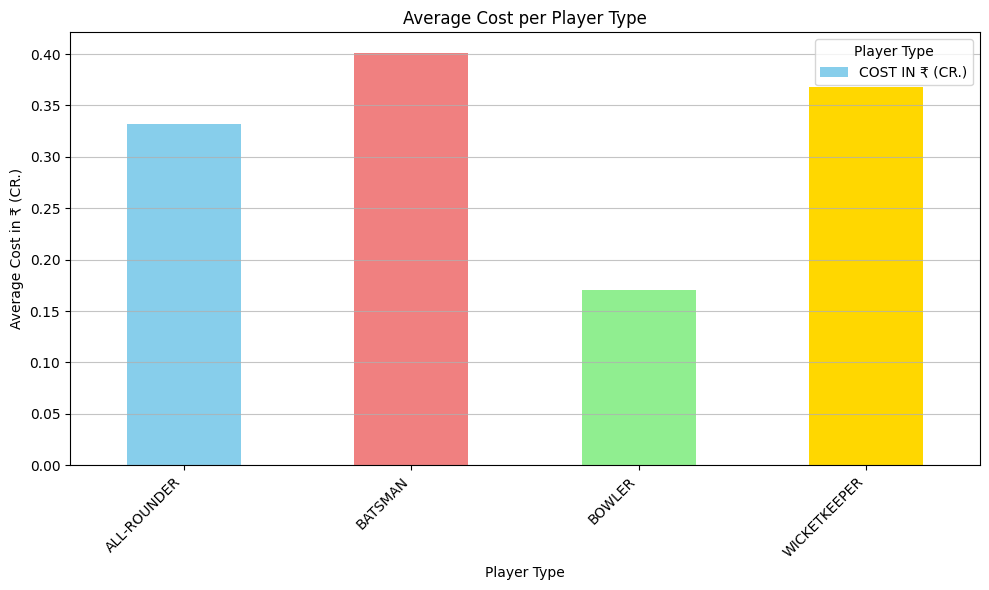

In [ ]:
plt.figure(figsize=(10, 6))
average_cost_per_type.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Average Cost per Player Type')
plt.xlabel('Player Type')
plt.ylabel('Average Cost in ₹ (CR.)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Player Type')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Identify Top 10 Most Expensive Players

### Subtask:
Identify and display the top 10 most expensive players based on their 'COST IN ₹ (CR.)', along with their 'Player' name and 'TYPE'.

**Reasoning**:
Sort the DataFrame by 'COST IN ₹ (CR.)' in descending order and select the top 10 players. This directly addresses the subtask's requirement to identify the top 10 most expensive players.



In [ ]:
top_10_expensive_players = ipl_df.sort_values(by='COST IN ₹ (CR.)', ascending=False).head(10)
print("Top 10 Most Expensive Players:")
print(top_10_expensive_players[['Player', 'TYPE', 'COST IN ₹ (CR.)']])

Top 10 Most Expensive Players:
               Player          TYPE  COST IN ₹ (CR.)
97         Sam Curran   ALL-ROUNDER            18.50
144     Cameron Green   ALL-ROUNDER            17.50
25         Ben Stokes   ALL-ROUNDER            16.25
119   Nicholas Pooran  WICKETKEEPER            16.00
218       Harry Brook       BATSMAN            13.25
219    Mayank Agarwal       BATSMAN             8.25
0         Shivam Mavi        BOWLER             6.00
193      Jason Holder   ALL-ROUNDER             5.75
50       Mukesh Kumar        BOWLER             5.50
220  Heinrich Klaasen  WICKETKEEPER             5.25


## Final Task

### Subtask:
Provide a comprehensive summary of the key findings and insights derived from the analysis of the 'IPL data.csv' dataset.


# Task
Provide a comprehensive summary of the key findings and insights derived from the analysis of the 'IPL data.csv' dataset.

## Summary:

### Data Analysis Key Findings

*   The dataset initially presented significant missing values, particularly in cost and base price columns, necessitating robust imputation strategies (median for numerical, mode for categorical). Filling missing 'COST IN ₹ (CR.)' values with 0 was crucial for distribution analysis.
*   Player costs are highly skewed, with a mean 'COST IN ₹ (CR.)' of 0.68 CR, but a median of 0 and a 75th percentile of only 0.2 CR. This indicates a large number of players with low or no cost, while a few commanded very high prices, up to a maximum of 18.5 CR.
*   'ALL-ROUNDERs' (213 players) and 'BOWLERs' (189 players) are the most numerous player types in the dataset.
*   Despite 'ALL-ROUNDERs' being numerous, 'BATSMAN' (0.40 CR) and 'WICKETKEEPER' (0.37 CR) had the highest average costs, followed by 'ALL-ROUNDER' (0.33 CR), while 'BOWLER' had the lowest average cost (0.17 CR).
*   The top 10 most expensive players are predominantly 'ALL-ROUNDERs' (e.g., Sam Curran, Cameron Green, Ben Stokes) and include key 'WICKETKEEPERs' and 'BATSMAN', highlighting their high market value.

### Insights or Next Steps

*   The IPL player market exhibits a bimodal structure: a large segment of players with low or no cost, and a smaller elite group commanding exceptionally high prices, emphasizing the premium placed on top-tier talent.
*   Multi-skilled 'ALL-ROUNDERs' are highly valued and frequently among the top earners, along with specialized 'BATSMAN' and 'WICKETKEEPERs', suggesting a strategic focus on versatile players and critical roles.


In [ ]:
from IPython.display import display
print("Summary statistics for 'COST IN ₹ (CR.)':")
display(ipl_df['COST IN ₹ (CR.)'].describe())

Summary statistics for 'COST IN ₹ (CR.)':


,COST IN ₹ (CR.)
count,568.000000
mean,0.294014
std,1.675826
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.500000
